In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv(r'C:\Users\HanSoul\Documents\analysis\datas\Autism_Adult_Data\Autism_Adult_Data.csv')
print(df.keys())
print(df.shape)
print(df.head())


Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
(704, 22)
   id  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         1         1         0         0         1   
1   2         1         1         0         1         0         0         0   
2   3         1         1         0         1         1         0         1   
3   4         1         1         0         1         0         0         1   
4   5         1         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jundice austim  \
0         1         0  ...       f  White-European      no     no   
1         1         0  ...       m          Latino      no    yes

count    702.000000
mean      29.698006
std       16.507465
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max      383.000000
Name: age, dtype: float64

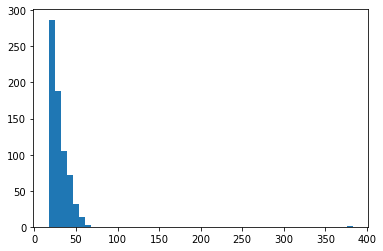

In [140]:
df_age=df['age']
df_age = pd.to_numeric(df_age[df_age.str.isnumeric()])
plt.hist(df_age, 50)
df_age.describe()

count    701.000000
mean      29.194009
std        9.711526
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

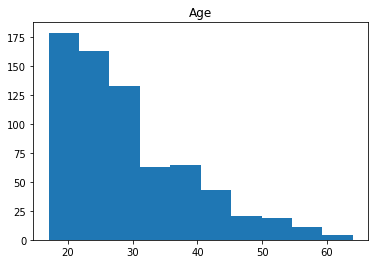

In [141]:
df_age= df_age.drop(df_age[df_age> 100].index)
plt.title("Age")
plt.hist(df_age)
df_age.describe()


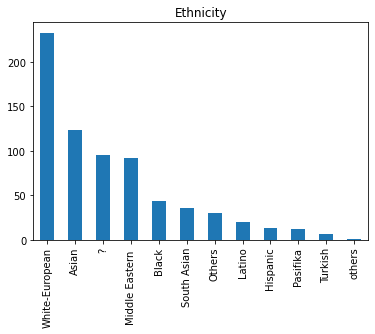

In [143]:
df_eth = df['ethnicity'].astype("category")
ax = df_eth.value_counts().plot(kind = 'bar', title = "Ethnicity")


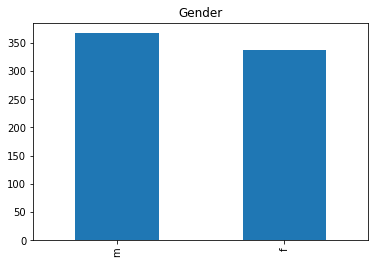

In [119]:
df_gen= df['gender'].astype("category")
ax = df_gen.value_counts().plot(kind = 'bar', title = "Gender")

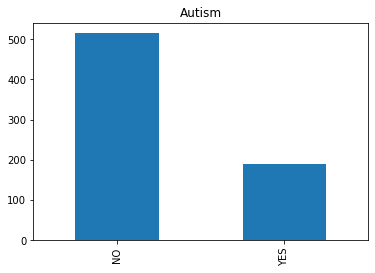

In [124]:
df_aus=df['Class/ASD']
ax = df_aus.value_counts().plot(kind = 'bar', title = "Autism")

In [194]:
# Could test scores predict autism?

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
y = df['Class/ASD']
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']]
print(y.shape)
print(X.shape)

X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train = X_train_all[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
X_test = X_test_all[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]



(704,)
(704, 21)


0.9811320754716981

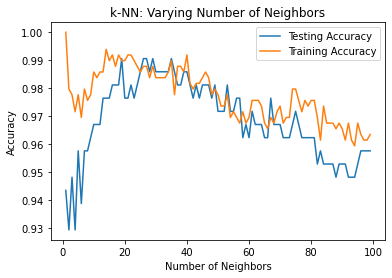

0.9811320754716981

In [199]:
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [205]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9858490566037735

count    490.000000
mean      29.283673
std        9.657273
min       17.000000
25%       22.000000
50%       27.000000
75%       34.750000
max       64.000000
Name: age, dtype: float64

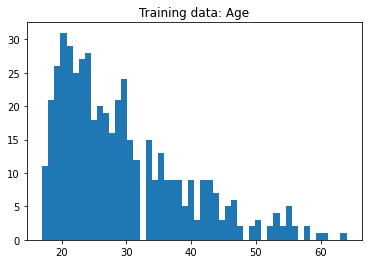

In [198]:
df_train_age = X_train_all['age']
df_train_age = pd.to_numeric(df_train_age[df_train_age.str.isnumeric()])
df_train_age = df_train_age.drop(df_train_age[df_train_age> 100].index)

plt.title("Training data: Age")
plt.hist(df_train_age, 50)
df_train_age.describe()


count    211.000000
mean      28.985782
std        9.856339
min       17.000000
25%       21.000000
50%       26.000000
75%       35.500000
max       61.000000
Name: age, dtype: float64

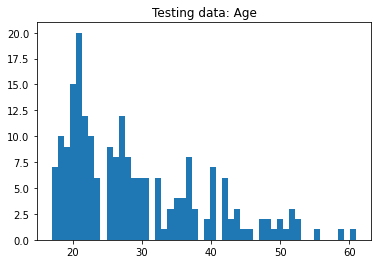

In [197]:
df_test_age = X_test_all['age']
df_test_age = pd.to_numeric(df_test_age[df_test_age.str.isnumeric()])
df_test_age = df_test_age.drop(df_test_age[df_test_age> 100].index)

plt.title("Testing data: Age")
plt.hist(df_test_age, 50)
df_test_age.describe()

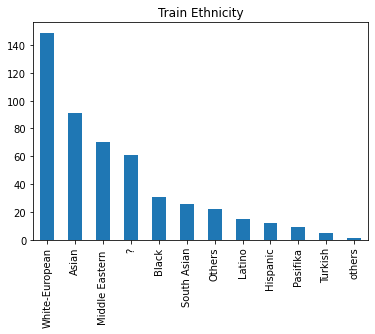

In [209]:
df_train_eth =  X_train_all['ethnicity'].astype("category")
ax = df_train_eth.value_counts().plot(kind = 'bar', title = "Train Ethnicity")

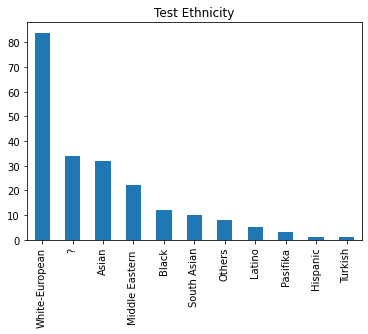

In [210]:
df_test_eth =  X_test_all['ethnicity'].astype("category")
ax = df_test_eth.value_counts().plot(kind = 'bar', title = "Test Ethnicity")

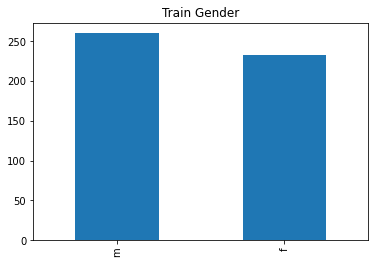

In [212]:
df_train_gen =  X_train_all['gender'].astype("category")
ax = df_train_gen.value_counts().plot(kind = 'bar', title = "Train Gender")

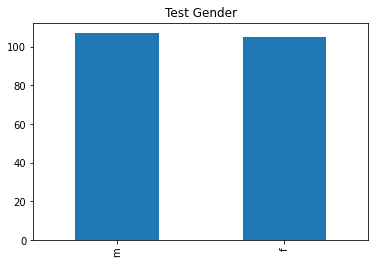

In [213]:
df_test_gen =  X_test_all['gender'].astype("category")
ax = df_test_gen.value_counts().plot(kind = 'bar', title = "Test Gender")

In [214]:
df_train_aus =  X_train_all['Class/ASD'].astype("category")
df_test_aus =  X_test_all['Class/ASD'].astype("category")


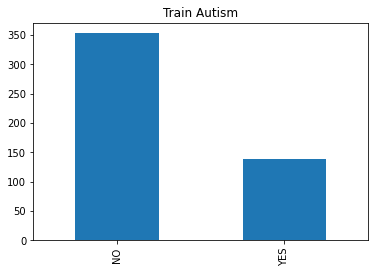

In [216]:
ax = df_train_aus.value_counts().plot(kind = 'bar', title = "Train Autism")

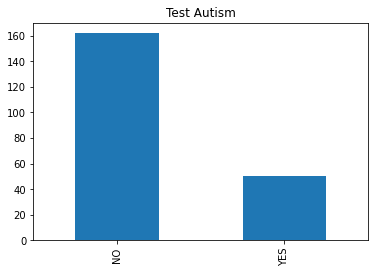

In [217]:
ax = df_test_aus.value_counts().plot(kind = 'bar', title = "Test Autism")